# Fun with Seaborn


In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()  # update matplotlib with sns styles

## Load all the things!
**sns** comes with some datasets to experiment with. The following code will load each dataset into a Pandas dataframe with the same name as the dataset, printing out each dataset as it is loaded. 

Note:
This code uses a metaprogramming trick to create a global variable: the builtin function *globals* returns a live mutable dictionary of all the global variables. It also uses **warnings.catch_warnings()** to suppress a warning that comes from the **Beautiful Soup** module.

In [2]:
import warnings
with warnings.catch_warnings(record=True):
    for dataset_name in sns.get_dataset_names():
        print(dataset_name)
        globals()[dataset_name] = sns.load_dataset(dataset_name)


anagrams
anscombe
attention
brain_networks
car_crashes
diamonds
dots
dowjones
exercise
flights
fmri
geyser
glue
healthexp
iris
mpg
penguins
planets
seaice
taxis
tips
titanic


In [22]:
dowjones.head()

,Date,Price
0,1914-12-01,55.00
1,1915-01-01,56.55
2,1915-02-01,56.00
3,1915-03-01,58.30
4,1915-04-01,66.45


In [23]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
for sex in 'female', 'male':
    print(sex)
    print(titanic[titanic['sex'] == sex]['age'].min())
    print(titanic[titanic['sex'] == sex]['age'].max())
    print(titanic[titanic['sex'] == sex]['age'].median())
    print(titanic[titanic['sex'] == sex]['age'].mean())
    


female
0.75
63.0
27.0
27.915708812260537
male
0.42
80.0
29.0
30.72664459161148


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


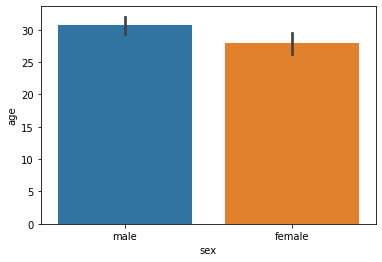

In [24]:
ax = sns.barplot(data=titanic, x='sex', y='age')

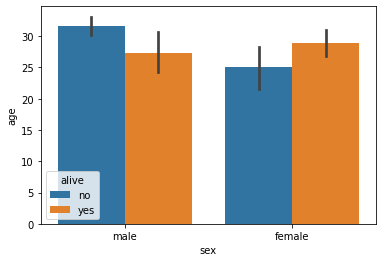

In [5]:
ax = sns.barplot(data=titanic, x='sex', y='age', hue='alive')

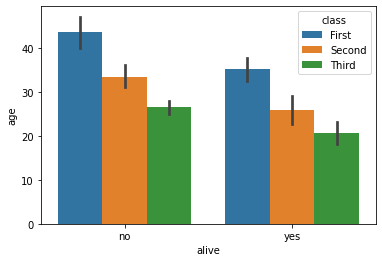

In [6]:
ax = sns.barplot(data=titanic, x='alive', y='age', hue='class')

In [25]:
vc = titanic.value_counts('pclass')
vc

pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [26]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [9]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


<Axes: xlabel='bill_length_mm', ylabel='species'>

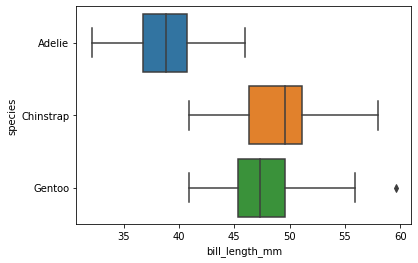

In [29]:
sns.boxplot(x=penguins.bill_length_mm,y=penguins.species)

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='species'>

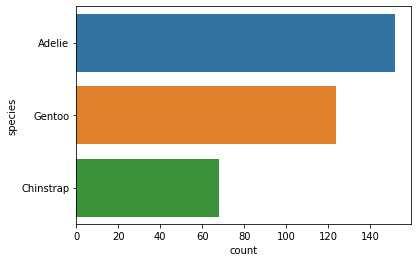

In [30]:
vc = penguins.value_counts('species')
print(vc)
sns.barplot(x=vc, y=vc.index)

In [31]:
vc = titanic.value_counts('class')
vc

class
Third     491
First     216
Second    184
Name: count, dtype: int64

<Axes: xlabel='class', ylabel='count'>

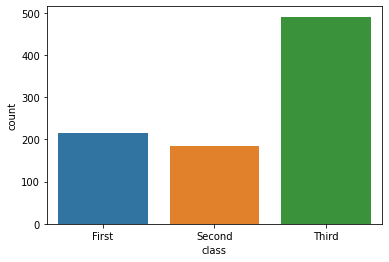

In [36]:
sns.barplot(x=vc.index, y=vc)

In [14]:
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


<Axes: xlabel='cylinders', ylabel='count'>

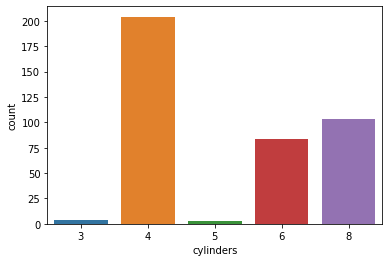

In [37]:
sns.countplot(data=mpg, x='cylinders')

(25.0, 350.0)

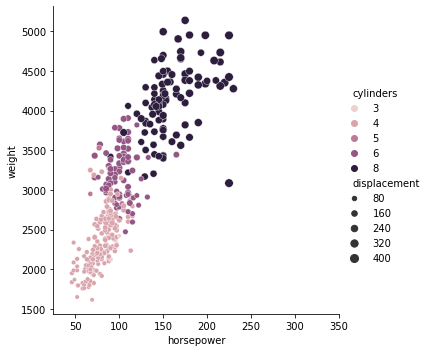

In [39]:
import mpld3
# tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
sns.relplot(data=mpg, x='horsepower', y='weight', hue='cylinders', size='displacement')
plt.xlim(25, 350)

<Axes: xlabel='mpg', ylabel='horsepower'>

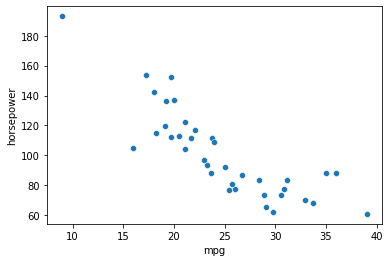

In [40]:
mpg['make'] = mpg['name'].str.split().apply(lambda e: e[0])
data = ((make, data['mpg'].mean(), data['horsepower'].mean()) for make, data in mpg.groupby('make'))  # generator
df = pd.DataFrame(data, columns='make mpg horsepower'.split())
sns.scatterplot(data=df, x='mpg', y='horsepower')

In [46]:
data = ((year, data['mpg'].mean(), data['horsepower'].mean()) for year, data in mpg.groupby('model_year'))  # generator
df = pd.DataFrame(data, columns='year mpg horsepower'.split())
df['year'] += 1900
df.dropna(inplace=True)
df.head()

,year,mpg,horsepower
0,1970,17.689655,147.827586
1,1971,21.250000,107.037037
2,1972,18.714286,120.178571
3,1973,17.100000,130.475000
4,1974,22.703704,94.230769


OptionError: "No such keys(s): 'mode.use_inf_as_null'"

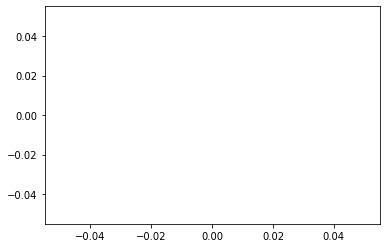

In [47]:
sns.lineplot(x=df['year'], y=df['mpg'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


OptionError: "No such keys(s): 'mode.use_inf_as_null'"

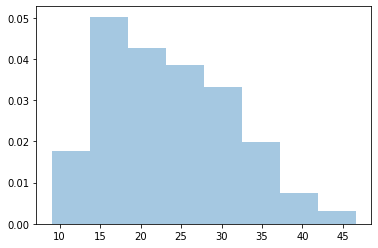

In [51]:
sns.distplot(mpg.mpg, bins=8)

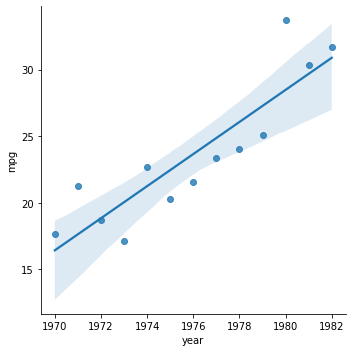

In [52]:
sns.lmplot(data=df, x='year', y='mpg')

In [50]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


<Axes: xlabel='species', ylabel='body_mass_g'>

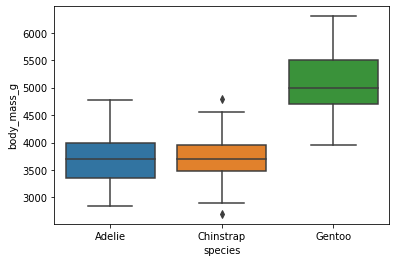

In [48]:
sns.boxplot(data=penguins, y="body_mass_g", x="species")

<Axes: xlabel='species', ylabel='body_mass_g'>

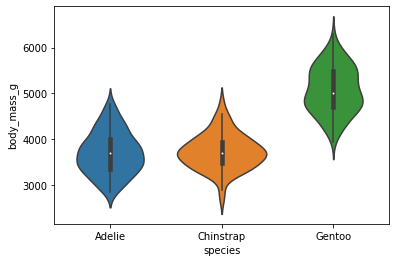

In [49]:
sns.violinplot(data=penguins, y="body_mass_g", x="species")